In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [27]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Train :", x_train.shape, y_train.shape)
print("Test  :", x_test.shape, y_test.shape)

Train : (60000, 28, 28) (60000,)
Test  : (10000, 28, 28) (10000,)


In [28]:
# Normalisation (0 → 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Ajouter une dimension pour les canaux (28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Nouvelle forme train :", x_train.shape)
print("Nouvelle forme test  :", x_test.shape)

Nouvelle forme train : (60000, 28, 28, 1)
Nouvelle forme test  : (10000, 28, 28, 1)


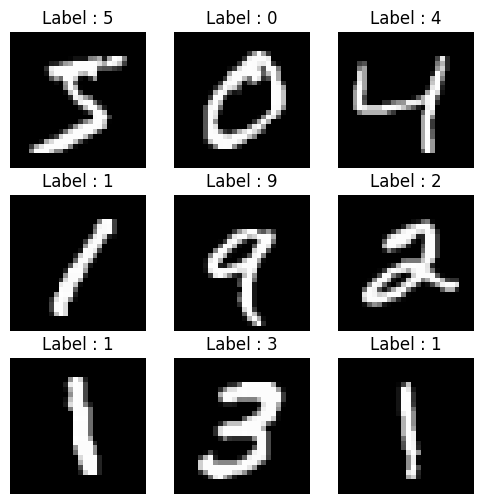

In [29]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label : {y_train[i]}")
    plt.axis('off')
plt.show()

In [30]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.8929 - loss: 0.3697 - val_accuracy: 0.9854 - val_loss: 0.0442
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9852 - loss: 0.0494 - val_accuracy: 0.9871 - val_loss: 0.0392
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9901 - loss: 0.0342 - val_accuracy: 0.9905 - val_loss: 0.0288
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9920 - loss: 0.0241 - val_accuracy: 0.9882 - val_loss: 0.0356
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9907 - val_loss: 0.0327


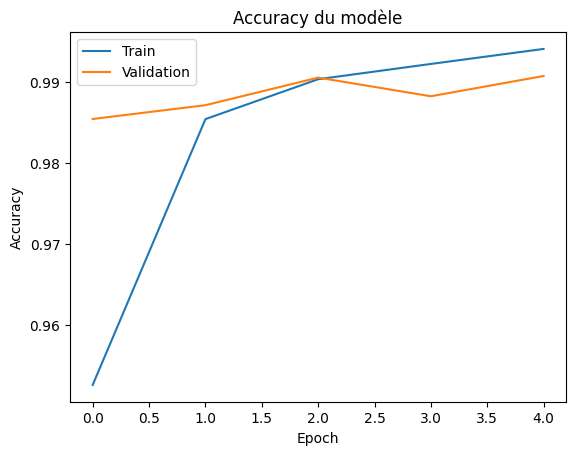

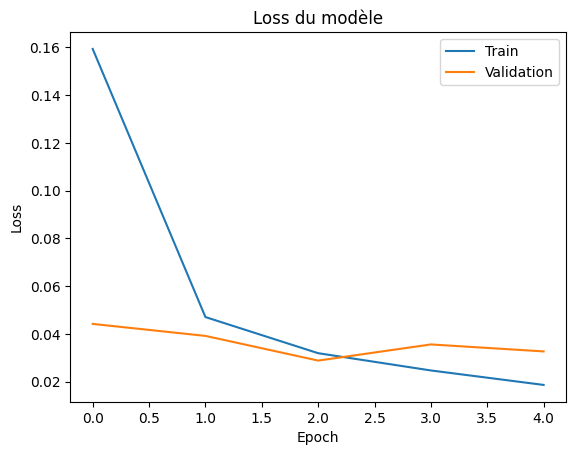

In [34]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy du modèle")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss du modèle")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur les données de test :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9894 - loss: 0.0397
Accuracy sur les données de test : 0.9907000064849854


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


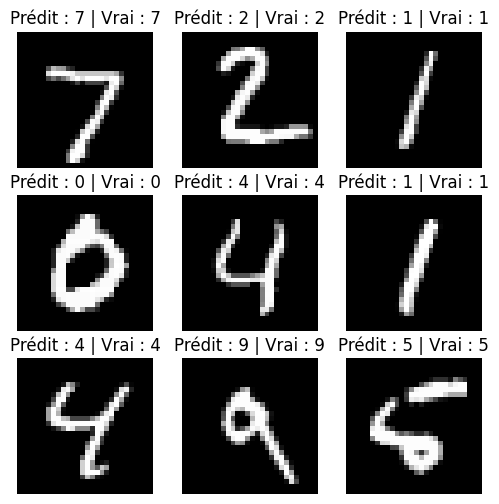

In [36]:
predictions = model.predict(x_test[:9])

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Prédit : {np.argmax(predictions[i])} | Vrai : {y_test[i]}")
    plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


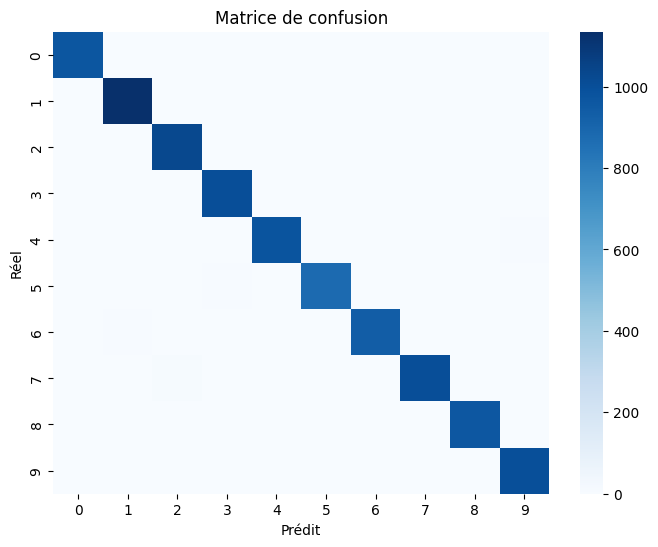

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [44]:
!pip install ipycanvas ipywidgets

In [52]:
from google.colab import output
output.enable_custom_widget_manager()

In [57]:
from ipycanvas import Canvas
from IPython.display import display
import numpy as np
from PIL import Image

# Créer le canvas AVEC synchronisation
canvas = Canvas(width=200, height=200, sync_image_data=True)
canvas.stroke_style = 'white'
canvas.line_width = 10

# Fond noir
canvas.fill_style = 'black'
canvas.fill_rect(0, 0, 200, 200)

drawing = False

def on_mouse_down(x, y):
    global drawing
    drawing = True
    canvas.begin_path()
    canvas.move_to(x, y)

def on_mouse_move(x, y):
    if drawing:
        canvas.line_to(x, y)
        canvas.stroke()

def on_mouse_up(x, y):
    global drawing
    drawing = False

canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)

display(canvas)


Canvas(height=200, sync_image_data=True, width=200)

In [58]:
from ipywidgets import Button, VBox, Label
import numpy as np
from PIL import Image

result_label = Label(value="Dessine un chiffre puis clique sur Prédire")

def predict_digit(b):
    # Récupérer les pixels du canvas
    image_data = canvas.get_image_data(0, 0, canvas.width, canvas.height)

    # Convertir en tableau numpy (on garde le canal rouge)
    img = np.array(image_data)[:, :, 0]

    # Redimensionner en 28x28 comme MNIST
    img = Image.fromarray(img).resize((28, 28))

    # Normalisation
    img = np.array(img) / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Prédiction
    prediction = model.predict(img)
    digit = np.argmax(prediction)

    result_label.value = f"Chiffre prédit : {digit}"

btn_predict = Button(description="Prédire")
btn_predict.on_click(predict_digit)

display(VBox([btn_predict, result_label]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [59]:
def clear_canvas(b):
    canvas.clear()
    canvas.fill_style = 'black'
    canvas.fill_rect(0, 0, 200, 200)
    result_label.value = "Dessine un chiffre puis clique sur Prédire"

btn_clear = Button(description="Effacer")
btn_clear.on_click(clear_canvas)

display(btn_clear)

Button(description='Effacer', style=ButtonStyle())